In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
stores = pd.read_csv('storespl.csv')
stores.head(20)

,Region,Store,state,region,latitude,longitude
0,PTCo,San Leandro,California,"955 Marina Blvd, San Leandro, CA 94577",37.713720,-122.159273
1,PTCo,Chico,California,"425 Southgate Ave, Chico, CA 95928",39.702514,-121.785499
2,PTCo,Fortuna,California,"1700 Alamar Way, Fortuna, CA 95540",40.580111,-124.151937
3,PTCo,Redding,California,"5100 Caterpillar Rd, Redding, CA 96003",40.627143,-122.371651
4,PTCo,San Martin,California,"13155 Sycamore Ave, San Martin, CA 95046",37.087561,-121.597286
5,PTCo,Santa Rosa,California,"3710 Regional Pkwy, Santa Rosa, CA 95403",38.508740,-122.786372
6,PTCo,Willits,California,"1471 B S Main St, Willits, CA 95490",39.395650,-123.348746
7,PMCo,Eugene,Oregon,"2300 Henderson Ave, Eugene, OR 97403",44.035821,-123.039135
8,PMCo,Hillsboro,Oregon,"5450 NE Five Oaks Dr, Hillsboro, OR 97124",45.558371,-122.908554
9,PMCo,Klamath Falls,Oregon,"1434 S 6th St, Klamath Falls, OR 97601",42.219466,-121.775311


In [15]:
equipments = pd.read_csv('all-yes.csv')
equipments.head()

,Serial Number,Manufacturer,PL Box,SUBSCRIPTION PL MODULE_SN,PL Box/Radio,Radio SN,NOT COVERED REASON,AUTHDECISION,2G Rollover Date,3G Rollover Date,...,OLGAOpp2Yr,OppPerAsset,Paid Sub,Product Category,Product Group,PSE Ranking,Rental,Sales Model,REPORTED_HOURS,SL GROUP_NO
0,1CR00177,CAT,PL243,20061500H0DX003F,PL243,20061500H0DX003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,Small,Small,N,BCP,BHL - BACKHOE LOADERS,NaN,No,426C,801.3515,1
1,1DD06517,CAT,PL243,21071300H0RV003F,PL243,21071300H0RV003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,Small,Small,N,EARTHMOVING,MTT - MEDIUM TRACK-TYPE TRACTORS (D5 - D8),NaN,No,D5H LGP,1.0128,2
2,1FDAF57P85ED06193,FA1,PL243,21062200H0HF003F,PL243,21062200H0HF003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,Large,Small,Y,Unknown,Unknown,NaN,No,Unknown,6776.4803,0
3,1FDRF3F67BEC12883,FA1,PL243,21062400H0DL003F,PL243,21062400H0DL003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,Large,Small,Y,Unknown,Unknown,NaN,No,Unknown,5279.0861,0
4,1FGBJK340VF016694,C81,PL243,21052000H0ZL003F,PL243,21052000H0ZL003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,Large,Small,Y,Unknown,Unknown,NaN,No,Unknown,1753.0033,0


In [16]:
# Renaming the column names 
equipments=equipments.rename(columns = {'EQP_GPS_SPEC_LAT_CORD':'lat','EQP_GPS_SPEC_LONG_CORD':'lon'})
stores=stores.rename(columns = {'latitude':'lat','longitude':'lon'})
# To make sure that there are no null values and All are either integers/ Float values 
equipments.info() 
print('\n XXXXXXXXXXXXXXXXXXXXXXX\n')
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Serial Number              3908 non-null   object 
 1   Manufacturer               3908 non-null   object 
 2   PL Box                     3908 non-null   object 
 3   SUBSCRIPTION PL MODULE_SN  3908 non-null   object 
 4   PL Box/Radio               3908 non-null   object 
 5   Radio SN                   3865 non-null   object 
 6   NOT COVERED REASON         3908 non-null   object 
 7   AUTHDECISION               3908 non-null   object 
 8   2G Rollover Date           3908 non-null   object 
 9   3G Rollover Date           3908 non-null   object 
 10  Priority Ranking           3908 non-null   object 
 11  Dealer                     3908 non-null   object 
 12  lat                        3908 non-null   float64
 13  lon                        3908 non-null   float

In [17]:
from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [18]:
def find_nearest(lat, long):
    distances = stores.apply(
        lambda row: dist(lat, long, row['lat'], row['lon']), 
        axis=1)
    return stores.loc[distances.idxmin(), 'Store']

In [19]:
equipments['Store'] = equipments.apply(
    lambda row: find_nearest(row['lat'], row['lon']), 
    axis=1)
# To check the data frame if it has a new column 
#equipments.head()

In [20]:
equipments = pd.merge(equipments,stores[['Store','lat','lon']],on='Store', how='left')
# Rename the new columns as both the columns has same name, and python gets confused 
equipments=equipments.rename(columns = {'lat_x':'m_lat','lon_x':'m_lon','lat_y':'h_lat','lon_y':'h_lon'})
#equipments.head()

In [21]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [22]:
# Creating a new column to generate the output by passing lat long information to Haversine Equation
equipments['distance(km)'] = [haversine(equipments.m_lon[i],equipments.m_lat[i],equipments.h_lon[i],equipments.h_lat[i]) for i in range(len(equipments))]
equipments['distance(km)'] = equipments['distance(km)'].round(decimals=2)
# Printing the data table 
#equipments.head()

In [23]:
equipments['distance (miles)'] = equipments['distance(km)'] * 0.62137119

equipments.head()

,Serial Number,Manufacturer,PL Box,SUBSCRIPTION PL MODULE_SN,PL Box/Radio,Radio SN,NOT COVERED REASON,AUTHDECISION,2G Rollover Date,3G Rollover Date,...,PSE Ranking,Rental,Sales Model,REPORTED_HOURS,SL GROUP_NO,Store,h_lat,h_lon,distance(km),distance (miles)
0,1CR00177,CAT,PL243,20061500H0DX003F,PL243,20061500H0DX003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,NaN,No,426C,801.3515,1,Salem,44.895566,-122.989212,87.77,54.537749
1,1DD06517,CAT,PL243,21071300H0RV003F,PL243,21071300H0RV003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,NaN,No,D5H LGP,1.0128,2,Salem,44.895566,-122.989212,23.69,14.720283
2,1FDAF57P85ED06193,FA1,PL243,21062200H0HF003F,PL243,21062200H0HF003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,NaN,No,Unknown,6776.4803,0,San Leandro,37.713720,-122.159273,30.48,18.939394
3,1FDRF3F67BEC12883,FA1,PL243,21062400H0DL003F,PL243,21062400H0DL003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,NaN,No,Unknown,5279.0861,0,San Leandro,37.713720,-122.159273,29.23,18.162680
4,1FGBJK340VF016694,C81,PL243,21052000H0ZL003F,PL243,21052000H0ZL003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,NaN,No,Unknown,1753.0033,0,San Leandro,37.713720,-122.159273,30.52,18.964249


In [24]:
equipments['year'] = pd.DatetimeIndex(equipments['4G Upgrade Date']).year
equipments['month'] = pd.DatetimeIndex(equipments['4G Upgrade Date']).month
equipments['day'] = pd.DatetimeIndex(equipments['4G Upgrade Date']).day

import calendar
equipments['month'] = equipments['month'].apply(lambda x: calendar.month_abbr[x])

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

equipments.month = pd.Categorical(equipments.month, months)
equipments.head()

,Serial Number,Manufacturer,PL Box,SUBSCRIPTION PL MODULE_SN,PL Box/Radio,Radio SN,NOT COVERED REASON,AUTHDECISION,2G Rollover Date,3G Rollover Date,...,REPORTED_HOURS,SL GROUP_NO,Store,h_lat,h_lon,distance(km),distance (miles),year,month,day
0,1CR00177,CAT,PL243,20061500H0DX003F,PL243,20061500H0DX003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,801.3515,1,Salem,44.895566,-122.989212,87.77,54.537749,2020,Sep,14
1,1DD06517,CAT,PL243,21071300H0RV003F,PL243,21071300H0RV003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,1.0128,2,Salem,44.895566,-122.989212,23.69,14.720283,2021,Nov,22
2,1FDAF57P85ED06193,FA1,PL243,21062200H0HF003F,PL243,21062200H0HF003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,6776.4803,0,San Leandro,37.713720,-122.159273,30.48,18.939394,2021,Aug,31
3,1FDRF3F67BEC12883,FA1,PL243,21062400H0DL003F,PL243,21062400H0DL003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,5279.0861,0,San Leandro,37.713720,-122.159273,29.23,18.162680,2021,Nov,29
4,1FGBJK340VF016694,C81,PL243,21052000H0ZL003F,PL243,21052000H0ZL003F,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,1753.0033,0,San Leandro,37.713720,-122.159273,30.52,18.964249,2021,Dec,22


In [25]:
table2 = pd.pivot_table(equipments, values='Serial Number', index=['Store'],
                    columns=['year'], aggfunc='count', fill_value=0)
table2

year,2020,2021,2022
Store,,,
Chico,53,59,12
Eugene,55,36,8
Fortuna,66,56,9
Hillsboro,320,320,69
Klamath Falls,20,16,13
Longview,21,37,6
Medford,72,26,11
North Bend,29,34,5
Redding,54,74,6


In [26]:
table2 = pd.pivot_table(equipments, values='Serial Number', index=['Store'],
                    columns=['UPGRADED TO 4G'], aggfunc='count', fill_value=0)
table2

UPGRADED TO 4G,Yes
Store,
Chico,124
Eugene,99
Fortuna,131
Hillsboro,709
Klamath Falls,49
Longview,64
Medford,109
North Bend,68
Redding,134


In [27]:
table3 = pd.pivot_table(equipments, values='Serial Number', index=['Territory Dealer Code'],
                    columns=['year'], aggfunc='count', fill_value=0)
table3

year,2020,2021,2022
Territory Dealer Code,,,
H370,1936,1621,351


In [28]:
table4 = pd.pivot_table(equipments, values='Serial Number', index=['UPGRADED TO 4G'],
                    columns=['year'], aggfunc='count', fill_value=0)
table4

year,2020,2021,2022
UPGRADED TO 4G,,,
Yes,1936,1621,351


# PENDING FLEET

In [29]:
pending = pd.read_csv('all-no.csv')
pending.head()

,Serial Number,Manufacturer,PL Box,SUBSCRIPTION PL MODULE_SN,PL Box/Radio,Radio SN,NOT COVERED REASON,AUTHDECISION,2G Rollover Date,3G Rollover Date,...,OLGAOpp2Yr,OppPerAsset,Paid Sub,Product Category,Product Group,PSE Ranking,Rental,Sales Model,REPORTED_HOURS,SL GROUP_NO
0,1AL00668,CAT,PL542,18061300G0660018,PL542,18061300G0660018,Approved - Data Authorization,Y,1/1/2017,7/31/2022,...,Small,Small,N,EARTHMOVING,MTG - MOTOR GRADERS,NaN,No,143H,8651.7108,1
1,1AL00710,CAT,PL542,18082200G0130039,PL542,18082200G0130039,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,Small,Small,N,EARTHMOVING,MTG - MOTOR GRADERS,NaN,No,143H,13995.8365,1
2,1AL01326,CAT,PL542,18030800G0K40018,PL542,18030800G0K40018,Approved - Data Authorization,Y,1/1/2017,7/31/2022,...,Small,Small,N,EARTHMOVING,MTG - MOTOR GRADERS,NaN,No,143H,844.2351,1
3,1DW644KZCHF680180,DEE,PL542,17071000G09D0018,PL542,17071000G09D0018,Approved - Data Authorization,Y,1/1/2017,7/31/2022,...,Small,Small,N,Unknown,Unknown,NaN,No,Unknown,5520.8083,0
4,1FDNF70J6WVA03160,FA1,PL141,BJ0T014C00,PL141,BJ0T014C00,Approved - Data Authorization,Y,1/1/2017,7/31/2022,...,Small,Small,Y,Unknown,Unknown,NaN,No,Unknown,NaN,0


In [30]:
# Renaming the column names 
pending=pending.rename(columns = {'EQP_GPS_SPEC_LAT_CORD':'lat','EQP_GPS_SPEC_LONG_CORD':'lon'})
stores=stores.rename(columns = {'latitude':'lat','longitude':'lon'})
# To make sure that there are no null values and All are either integers/ Float values 
pending.info() 
print('\n XXXXXXXXXXXXXXXXXXXXXXX\n')
stores.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Serial Number              2609 non-null   object 
 1   Manufacturer               2609 non-null   object 
 2   PL Box                     2609 non-null   object 
 3   SUBSCRIPTION PL MODULE_SN  2609 non-null   object 
 4   PL Box/Radio               2609 non-null   object 
 5   Radio SN                   2585 non-null   object 
 6   NOT COVERED REASON         2609 non-null   object 
 7   AUTHDECISION               2609 non-null   object 
 8   2G Rollover Date           2609 non-null   object 
 9   3G Rollover Date           2609 non-null   object 
 10  Priority Ranking           2609 non-null   object 
 11  Dealer                     2609 non-null   object 
 12  lat                        2609 non-null   float64
 13  lon                        2609 non-null   float

In [31]:
pending['Store'] = pending.apply(
    lambda row: find_nearest(row['lat'], row['lon']), 
    axis=1)
# To check the data frame if it has a new column 
#pending.head()

In [32]:
pending = pd.merge(pending,stores[['Store','lat','lon']],on='Store', how='left')
# Rename the new columns as both the columns has same name, and python gets confused 
pending=pending.rename(columns = {'lat_x':'m_lat','lon_x':'m_lon','lat_y':'h_lat','lon_y':'h_lon'})
#pending.head()

In [33]:
# Creating a new column to generate the output by passing lat long information to Haversine Equation
pending['distance(km)'] = [haversine(pending.m_lon[i],pending.m_lat[i],pending.h_lon[i],pending.h_lat[i]) for i in range(len(pending))]
pending['distance(km)'] = pending['distance(km)'].round(decimals=2)
# Printing the data table 
#pending.head()

In [34]:
pending['distance (miles)'] = pending['distance(km)'] * 0.62137119

#pending.head()

In [35]:
pending.head()

,Serial Number,Manufacturer,PL Box,SUBSCRIPTION PL MODULE_SN,PL Box/Radio,Radio SN,NOT COVERED REASON,AUTHDECISION,2G Rollover Date,3G Rollover Date,...,PSE Ranking,Rental,Sales Model,REPORTED_HOURS,SL GROUP_NO,Store,h_lat,h_lon,distance(km),distance (miles)
0,1AL00668,CAT,PL542,18061300G0660018,PL542,18061300G0660018,Approved - Data Authorization,Y,1/1/2017,7/31/2022,...,NaN,No,143H,8651.7108,1,Redmond,44.241228,-121.188523,43.74,27.178776
1,1AL00710,CAT,PL542,18082200G0130039,PL542,18082200G0130039,Approved - Data Authorization,Y,1/1/2017,2/22/2022,...,NaN,No,143H,13995.8365,1,Redding,40.627143,-122.371651,82.44,51.225841
2,1AL01326,CAT,PL542,18030800G0K40018,PL542,18030800G0K40018,Approved - Data Authorization,Y,1/1/2017,7/31/2022,...,NaN,No,143H,844.2351,1,Klamath Falls,42.219466,-121.775311,115.59,71.824296
3,1DW644KZCHF680180,DEE,PL542,17071000G09D0018,PL542,17071000G09D0018,Approved - Data Authorization,Y,1/1/2017,7/31/2022,...,NaN,No,Unknown,5520.8083,0,Santa Rosa,38.508740,-122.786372,52.74,32.771117
4,1FDNF70J6WVA03160,FA1,PL141,BJ0T014C00,PL141,BJ0T014C00,Approved - Data Authorization,Y,1/1/2017,7/31/2022,...,NaN,No,Unknown,NaN,0,San Leandro,37.713720,-122.159273,40.76,25.327090


In [36]:
table_pending = pd.pivot_table(pending, values='Serial Number', index=['Store'],
                    columns=['Action'], aggfunc='count', fill_value=0)
table_pending

Action,Yes
Store,
Chico,126
Eugene,84
Fortuna,78
Hillsboro,43
Klamath Falls,111
Longview,55
Medford,208
North Bend,119
Redding,129


In [37]:
table_pending.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Chico to Willits
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Yes     16 non-null     int64
dtypes: int64(1)
memory usage: 256.0+ bytes


In [38]:
pending.to_csv("pendingooK.csv", sep='\t', encoding='utf-8')

In [40]:
pending1 = pd.read_csv('PENDING-.csv')
pending1.head()

,Serial Number,Manufacturer,PL Box,SUBSCRIPTION PL MODULE_SN,PL Box/Radio,Radio SN,NOT COVERED REASON,AUTHDECISION,2G Rollover Date,3G Rollover Date,...,PSE Ranking,Rental,Sales Model,REPORTED_HOURS,SL GROUP_NO,Store,h_lat,h_lon,distance(km),distance (miles)
0,1GC1KVEG9FF578797,C81,PL641,0206S209YD,PL641e,0206S209YD,Approved - Data Authorization,Y,1/1/2017,12/31/2022,...,NaN,No,Unknown,8622.6025,0,Chico,39.702514,-121.785499,35.01,21.754205
1,1JG00105,CAT,PL240B,2163079477,PL240B,2163079477,Approved - Data Authorization,Y,1/1/2017,7/31/2022,...,NaN,No,AP-1050,8938.8864,10,Chico,39.702514,-121.785499,42.03,26.116231
2,2JM00599,CAT,PL240B,2163079940,PL240B,2163079940,Approved - Data Authorization,Y,1/1/2017,7/31/2022,...,NaN,No,CP-433C,2444.5028,10,Chico,39.702514,-121.785499,49.91,31.012636
3,2X401747,CAT,PL641,3138S053YG,PL641e,3138S053YG,Approved - Data Authorization,Y,1/1/2017,12/31/2022,...,NaN,No,CB24B,253.1427,1,Chico,39.702514,-121.785499,21.72,13.496182
4,2X401800,CAT,PL641,3228S226YG,PL641e,3228S226YG,Approved - Data Authorization,Y,1/1/2017,12/31/2022,...,NaN,No,CB24B,165.0746,1,Chico,39.702514,-121.785499,15.73,9.774169


In [41]:
asd = equipments.groupby(['Store', 'UPGRADED TO 4G']).count()
asd

,,Serial Number,Manufacturer,PL Box,SUBSCRIPTION PL MODULE_SN,PL Box/Radio,Radio SN,NOT COVERED REASON,AUTHDECISION,2G Rollover Date,3G Rollover Date,...,Sales Model,REPORTED_HOURS,SL GROUP_NO,h_lat,h_lon,distance(km),distance (miles),year,month,day
Store,UPGRADED TO 4G,,,,,,,,,,,,,,,,,,,,,
Chico,Yes,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
Eugene,Yes,99,99,99,99,99,90,99,99,99,99,...,99,98,99,99,99,99,99,99,99,99
Fortuna,Yes,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
Hillsboro,Yes,709,709,709,709,709,695,709,709,709,709,...,709,708,709,709,709,709,709,709,709,709
Klamath Falls,Yes,49,49,49,49,49,48,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
Longview,Yes,64,64,64,64,64,61,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
Medford,Yes,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
North Bend,Yes,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
Redding,Yes,134,134,134,134,134,133,134,134,134,134,...,134,134,134,134,134,134,134,134,134,134


In [42]:
asd1 = pending.groupby(['Store', 'Action']).count()
asd1

,,Serial Number,Manufacturer,PL Box,SUBSCRIPTION PL MODULE_SN,PL Box/Radio,Radio SN,NOT COVERED REASON,AUTHDECISION,2G Rollover Date,3G Rollover Date,...,Product Group,PSE Ranking,Rental,Sales Model,REPORTED_HOURS,SL GROUP_NO,h_lat,h_lon,distance(km),distance (miles)
Store,Action,,,,,,,,,,,,,,,,,,,,,
Chico,Yes,126,126,126,126,126,125,126,126,126,126,...,126,13,126,126,126,126,126,126,126,126
Eugene,Yes,84,84,84,84,84,83,84,84,84,84,...,84,12,84,84,84,84,84,84,84,84
Fortuna,Yes,78,78,78,78,78,78,78,78,78,78,...,78,10,78,78,78,78,78,78,78,78
Hillsboro,Yes,43,43,43,43,43,42,43,43,43,43,...,43,6,43,43,43,43,43,43,43,43
Klamath Falls,Yes,111,111,111,111,111,111,111,111,111,111,...,111,12,111,111,111,111,111,111,111,111
Longview,Yes,55,55,55,55,55,55,55,55,55,55,...,55,8,55,55,55,55,55,55,55,55
Medford,Yes,208,208,208,208,208,208,208,208,208,208,...,208,32,208,208,208,208,208,208,208,208
North Bend,Yes,119,119,119,119,119,119,119,119,119,119,...,119,14,119,119,119,119,119,119,119,119
Redding,Yes,129,129,129,129,129,128,129,129,129,129,...,129,14,129,129,129,129,129,129,129,129


In [43]:
# read csv data
df1 = asd['Serial Number']
df2 = asd1['Serial Number']
   
inner = pd.merge(df1, 
                 df2, 
                 on ='Store', 
                 how ='left')

sum_column = inner["Serial Number_x"] + inner["Serial Number_y"]
inner["Total"] = sum_column

inner.head(20)

,Serial Number_x,Serial Number_y,Total
Store,,,
Chico,124,126,250
Eugene,99,84,183
Fortuna,131,78,209
Hillsboro,709,43,752
Klamath Falls,49,111,160
Longview,64,55,119
Medford,109,208,317
North Bend,68,119,187
Redding,134,129,263


In [44]:
porcentaje = inner.rename(columns={"Serial Number_x": "DONE", "Serial Number_y": "PENDING"})
porcentaje

,DONE,PENDING,Total
Store,,,
Chico,124,126,250
Eugene,99,84,183
Fortuna,131,78,209
Hillsboro,709,43,752
Klamath Falls,49,111,160
Longview,64,55,119
Medford,109,208,317
North Bend,68,119,187
Redding,134,129,263


In [45]:
porcentaje['% DONE'] = ((porcentaje['DONE'] / porcentaje['Total'])*100).round(2).astype(str) + '%'
porcentaje['% PENDING'] = ((porcentaje['PENDING'] / porcentaje['Total'])*100).round(2).astype(str) + '%'
porcentaje

,DONE,PENDING,Total,% DONE,% PENDING
Store,,,,,
Chico,124,126,250,49.6%,50.4%
Eugene,99,84,183,54.1%,45.9%
Fortuna,131,78,209,62.68%,37.32%
Hillsboro,709,43,752,94.28%,5.72%
Klamath Falls,49,111,160,30.63%,69.38%
Longview,64,55,119,53.78%,46.22%
Medford,109,208,317,34.38%,65.62%
North Bend,68,119,187,36.36%,63.64%
Redding,134,129,263,50.95%,49.05%


In [46]:
porcentaje['% DONE'] = ((porcentaje['DONE'] / porcentaje['Total'])*100).round(2).astype(str) + '%'
porcentaje['Recommended per month'] = (porcentaje['PENDING'] / 8).round()
porcentaje

,DONE,PENDING,Total,% DONE,% PENDING,Recommended per month
Store,,,,,,
Chico,124,126,250,49.6%,50.4%,16.0
Eugene,99,84,183,54.1%,45.9%,10.0
Fortuna,131,78,209,62.68%,37.32%,10.0
Hillsboro,709,43,752,94.28%,5.72%,5.0
Klamath Falls,49,111,160,30.63%,69.38%,14.0
Longview,64,55,119,53.78%,46.22%,7.0
Medford,109,208,317,34.38%,65.62%,26.0
North Bend,68,119,187,36.36%,63.64%,15.0
Redding,134,129,263,50.95%,49.05%,16.0


In [47]:
porcentaje['Store'] = porcentaje.index
porcentaje

,DONE,PENDING,Total,% DONE,% PENDING,Recommended per month,Store
Store,,,,,,,
Chico,124,126,250,49.6%,50.4%,16.0,Chico
Eugene,99,84,183,54.1%,45.9%,10.0,Eugene
Fortuna,131,78,209,62.68%,37.32%,10.0,Fortuna
Hillsboro,709,43,752,94.28%,5.72%,5.0,Hillsboro
Klamath Falls,49,111,160,30.63%,69.38%,14.0,Klamath Falls
Longview,64,55,119,53.78%,46.22%,7.0,Longview
Medford,109,208,317,34.38%,65.62%,26.0,Medford
North Bend,68,119,187,36.36%,63.64%,15.0,North Bend
Redding,134,129,263,50.95%,49.05%,16.0,Redding


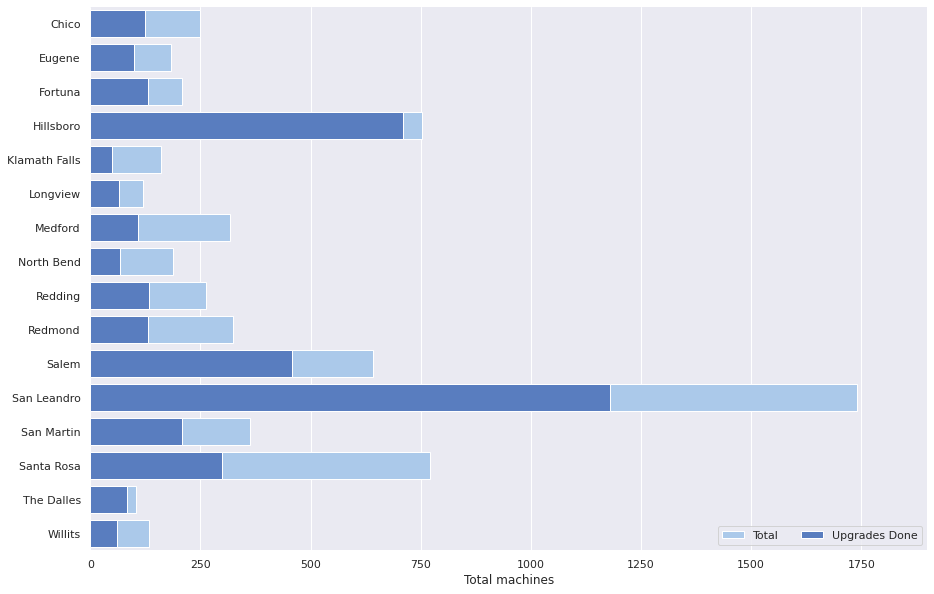

In [48]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Store", data=porcentaje,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="DONE", y="Store", data=porcentaje,
            label="Upgrades Done", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1900), ylabel="",
       xlabel="Total machines")
sns.despine(left=True, bottom=True)